This is a propery price prediction using a regressiong model project.

The dataset used in this project is Bangaluru_House_Data from : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

The idea and method of this project are heavily inspired and following tutor from Dhaval Patel youtube Codebasic (https://www.youtube.com/codebasics).

In this project, i try to add 2 new feature which is using area_type and availability, which unfortunately doesnt increase the accuracy significantly. But it's enabled user to view the difference of area_type and availability when predicting property price.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from IPython.display import display

matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Preparation & Cleaning

In [2]:
"""
Our Dataset comes from : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data
This dataset is made up of 9 column, which is :
1. location : The location of the property
2. size : The rought estimation of BHK (Bedroom, Hall and Kitchen)
3. total_sqft : The total sqft of the property
4. bath : the_number of bath of the property
5.
"""
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
"""
The shape of our raw dataset is 13320 row which is made of 9 column, This means we got approximately 13330*9 = 119.880 data
point
"""
df1.shape 

(13320, 9)

In [4]:
"""
With the code below, we can see each of unique value for a colum
The 1st column_name will indicate the groupby column, the 2nd one will be which column to be aggregate in this case 
"""
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [5]:
# We will drop the following column for convenience
df2 = df1.drop(['society','balcony'], axis='columns')
df2.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
"""
After we get the selected feature, we can start with data cleaning.
First we will check if there's null inside the column

We found that there's null on column : location, size and bath.
"""
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [7]:
"""
From the code before, we can see that the number of null value is not significant, as such we can fortunately ignore
and delete it (We have 13320 row of data, so it's fine to delete around 100 row of it)
"""
df3 = df2.dropna(subset=['location', 'size', 'bath'])
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

### Size Data Preparation & Cleaning

In [8]:
# Next we will look at the categorical data in this case the size, we can also see the unique variable for size column with
# unique()
"""
Before we do anything to data in size column, we should see what kind of value is there in this column
To do that we should use pandas unique() method, that will return all unique value into an array of list.
"""
size_array = df3['size'].unique()
size_array

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
"""
From the above code we can see that the values for size column is a number separated by space and then their description.
From this information we can assume that the number in front will meant the size or number of room inside the house as such
we can create a code to take only the number and store it into a new column.

The code below using lambda function will loop trough all row in size column, and then will split the data into a list by
separating it when " " is found. Then we will convert it into int to convert it's type from string.
"""
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-9-acd84647df25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
# To see if the above code work properly, let's see if there's a new 'bhk' column
df3.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
"""
 After we got the new column, let's see the number of room inside each property, and here we notice that there's row value
which is suspicious, because it's outside the normal room for example there's property with 43/27 room.

 We should try to see if it's reasonable for a property to have 43 or 27 room. 
"""
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
"""
 From the code above we find a suspicious number of room, So let's see what kind of property have more
than 20 rooms.

 To do this we used the code below, the first dataframe(df3) will indicate the dataframe we want to use, 
then the 2nd dataframe (df3.bhk) will make it a series so we can do logical operation.

 As we can see that it's certainly not possible for a 2400 sqft property to have 43 bhk, and we should consult this with
our business expert and presumably delete this data point.
"""
display(df3[df3.bhk>20])
df3.shape

,area_type,availability,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


(13246, 8)

In [13]:
df4 = df3[~(df3.bhk>20)]
df4.shape

(13244, 8)

### Total_sqft Data Preparation & Cleaning

In [14]:
# But before we do anything to it let's clean the numerical data total_sqft 1st to see if there's more problem like the above.
# With the code below we can see there's one unique variable which is 1133 - 1384 and not a single value.
"""
But before that let's cleanup the total_sqft to see the relation of size and total_sqft, and get a bigger picture to see if
such problem exists anywhere.

With the code below, we can notice there's values, which is range of the total_sqft
"""
display(df4.total_sqft.unique())

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
"""
We can check for all the same case in this dataset by converting it to float and returning all that can't be converted
with the function below
"""
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
"""
We will apply the function above to all the data in our dataset
The "~" is for returning all the exception data
"""
df4[~df4['total_sqft'].apply(is_float)].head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [17]:
"""
 After we got all the exception from total_sqft we can further calculate the mean of such sqft number this function 
will split the number from the "-" so we got 2 number.

Then we will adds these 2 number and divide it by 2 to get the mean.

Exception other than the range of sqftnumber will be ignored for convenience and also the small amount
"""
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return((float((tokens[0]))+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [18]:
# Function test #1
convert_sqft_to_num('2116')

2116.0

In [19]:
# Function test #2
convert_sqft_to_num('1015 - 1540')

1277.5

In [20]:
# Run the function for all the data with apply 
df5 = df4.copy()
df5['total_sqft'] = df5['total_sqft'].apply(convert_sqft_to_num)
df5.head(5)

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
# we can see that before for data index 30 the total_sqft value is 2100 - 2850
# Then we run it trought the function and got 2475 which is : (2850+2100)/2 = 2475 
df5.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
total_sqft                      2475
bath                               4
price                            186
bhk                                4
Name: 30, dtype: object

# Feature Engineering

In [22]:
"""
One of the most important feature when training a propert price prediction model is the price per sqft
The code below will add a new column for price_per_sqft from dividing the price listed and total_sqft for each property
The price will be times 100000 because the data listed is 1 lakh which is equal = 100000 rupee
"""
df6 = df5.copy()
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
"""
Here we can see from the location feature we got 1304 distinct values
This is a categorical location, but the amount is a problem because of it's dimensionality too big
We can try to reduce the dimensionality by converting some of the unused (not many) to a single value for example 'others'
"""
len(df6.location.unique())

1303

In [24]:
"""
But first we have to know how much occurant for each unique value inside this column
We strip the string in column location to ensure there's no extra space before and after which will bring more unique value.
Then we will use groupby and aggregation to count each occurent of unique value inside the dataset
We can note that there are 1293 unique value inside this column, and each unique value occured varied from 535 to 1
"""
df6.location = df6.location.apply(lambda x: x.strip())
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1292, dtype: int64

In [25]:
"""
 We can then conclude that if a location didn't occur for example more than 10 times. 
it's not significant enough to be included

 We could count the number of unique value which occurance is less than 10 with the code below. 
This works because the variable is series.
"""
len(location_stats[location_stats<=10])

1051

In [26]:
# We save the unque value of location where they occured less than 10 times into a variable
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sector 1 HSR Layout    10
Dodsworth Layout       10
Gunjur Palya           10
Nagadevanahalli        10
Naganathapura          10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1051, dtype: int64

In [27]:
# As noted before in our current dataset there's 1293 unique value inside the location column
len(df6.location.unique())

1292

In [28]:
"""
 And then after we replace the unique value with less than 10 occurance with other, 
we can see the number of category is 242
"""
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

242

# Outlier Removal

In [29]:
"""
After feature engineering we can continue to outlier detection and removal
First we will try to remove outlier from the price_per_sqft
The logic behind this is, a number of bhk will correspond to the total_sqft for that property
For example for each BHK it will usually require a 500 sqft
The informatio above is domain knowledge and should be consulted to a business expert
"""
df6.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
"""
Assume that you have talked to a business expert and that it's highly unusual if the sqft for each room is below 300
Then we could see if there's any datapoint that's included in that criteria
Which is : (total_sqft/number_of_bhk) is below 300
"""
df6[df6.total_sqft/df6.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
"""
From the code above, we can assume there's a few which met the criteria for outliers from the business expert.
Then we should start to remove those
"""
df6.shape

(13244, 9)

In [32]:
"""
 We can easily remove the one that meet criteria by using the "~" (Negate) function 
which will delete the value from our dataset
"""
df7 = df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(12502, 9)

In [33]:
"""
 Next, we can see from the describe function that the minimum price per sqft is 267 and maximum is 176470,
this show that the price range is rather huge
Then, We can use the concept of STD here to pinpoint the outlier for the price_per_sqft.
For this we will assume that the outlier will be +-1 STD from the mean of price in each location.
"""
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
"""
And so to remove the outlier which is +-1 STD from the mean of price we can use the function below
This function will loop through all possible value in location column, then get the median and std for that unique location
we will then check for each value in that specific location if it's inside the 1STD range.
if the value isn't inside the 1 STD range then we will store it in the reduced_df dataframe
which we wil then cut from the original dataframe with concat.
"""
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df8 = remove_pps_outliers(df7)
df8.shape

(10241, 9)

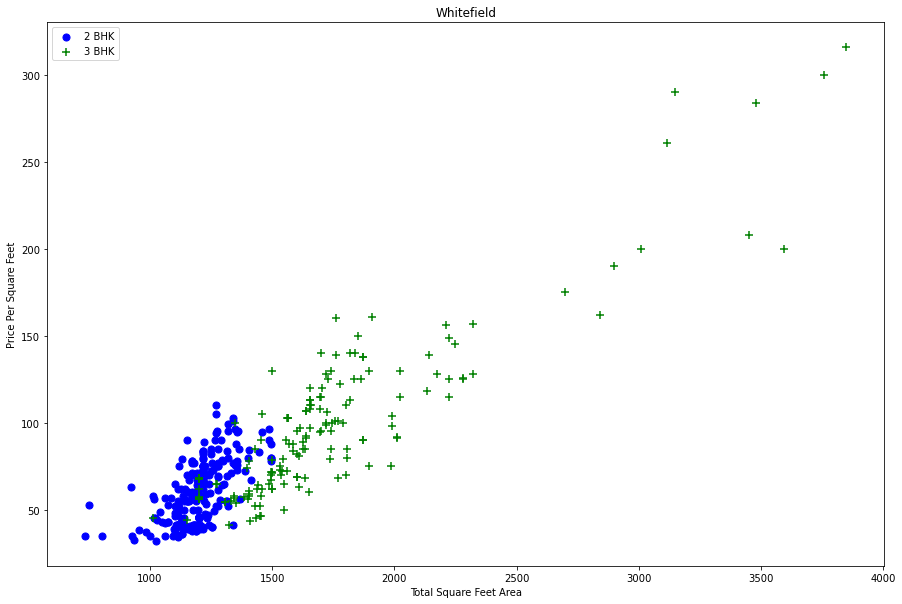

In [35]:
"""
 Next, we can also assume that for the same place, a 2 bedroom house will have a lower price than a 3 bedroom house 
and etc

 To see this let us see spread of data for 2 BHK and 3 BHK with their corresponding price_per_sqft
 The function below will first get the original dataframe, then separate it for the corresponding location
which had 2 or 3 BHK

 We can see from the scatter plot, that for the location of "Whitefield" there's a bit of overlap for 2 and 3 BHK 
in the 12500 and 15000 price range
"""
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8, "Whitefield")

In [36]:
"""
To try and remove those overlap we can use the function below :

First the function will receive the dataframe, then we will prepare an np array to store data that's an outlier.
First we will loop the dataframe grouped by location, this is to make sure we are separating each location.
Second, we will create a dictionary of bhk_stats to track each location mean,std,count for each number of BHK.
To do this we will had to loop again for each number of BHK then record each bhk count : mean,std and count.
Third we will loop for each number of bhk again, and listed the stats we gather before for the stats before.
In this loop we will append the data, which price_per_sqft is below the previous mean of bhk number.
Last we will drop all the data we catch before returning the dataframe.
"""
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locations, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df9 = remove_bhk_outliers(df8)
df9.shape

(7329, 9)

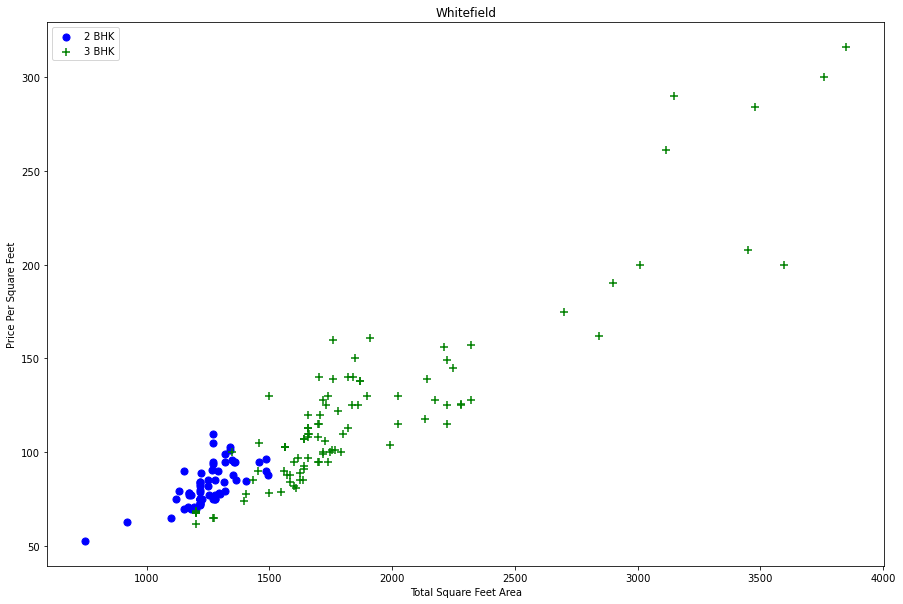

In [37]:
# We can see from the scatter plot below that some of the bhk 3 which is overlap with bhk2 is reduced.
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9, "Whitefield")

Text(0, 0.5, 'Count')

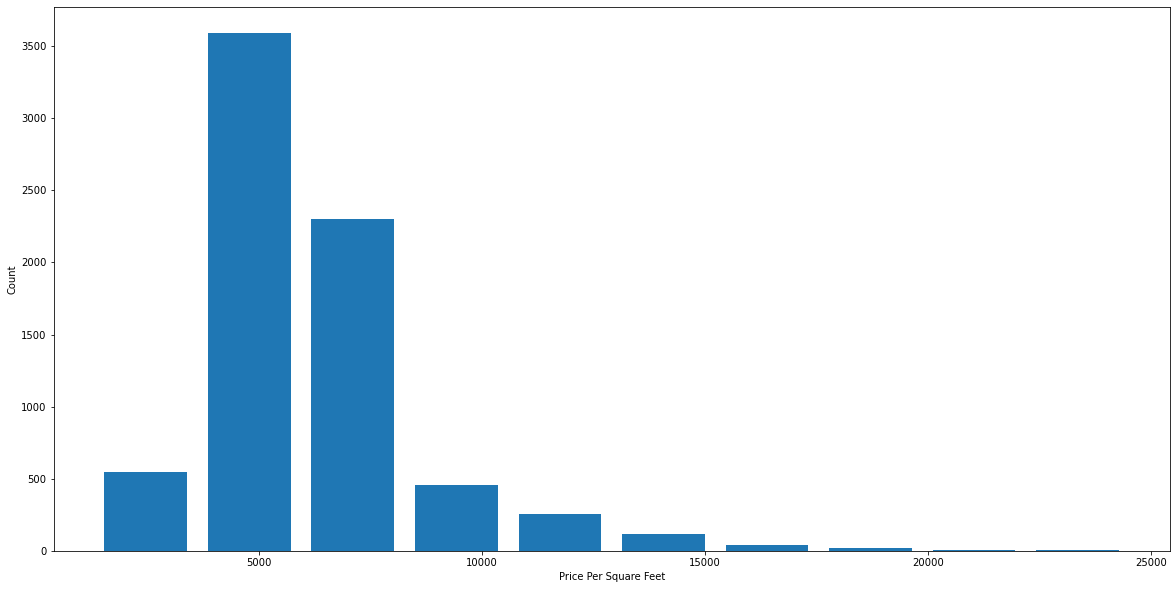

In [38]:
# We can also see the spread of price_per_sqft, which from the histogram below are concentrated in 5000
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df9.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
# Next we can also see the outlier from the amount of bathroom for each property
# We can see that in our dataset we can have number of bathroom between 1 to 16
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [40]:
# Then we can try to consult to business expert again, for what's a normal number of bathroom for each BHK size
# Then let's see what kind of data are when the number of bathroom is more than 10
 
df9[df9.bath>10]

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,Super built-up Area,Ready To Move,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,Super built-up Area,Ready To Move,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,Super built-up Area,Ready To Move,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

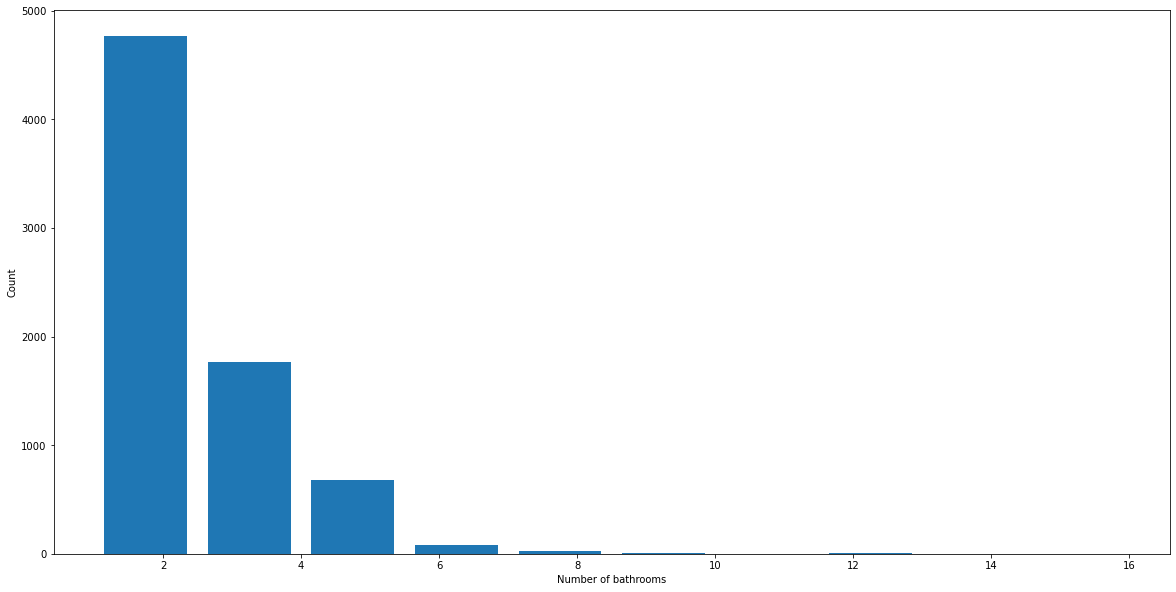

In [41]:
# we can also see the spread of data for number of bathrooms 
plt.hist(df9.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [42]:
# Let's say that the business expert told us, usually the number of bathroom is +2 of BHK
# then we can see if there's any datapoint which is outside above statement
df9[df9.bath>df9.bhk+2]

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,Super built-up Area,Ready To Move,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [43]:
# We can easily remove those with this code
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7251, 9)

In [44]:
# We can conclude that our data is clean enough here
# So, we should drop any unnecessary column, in this case size and price_per_sqft
# Size because we should just use the BHK column that we made and price_per_sqft because it's only used for outlier detection
df11 = df10.drop(['size','price_per_sqft'],axis='columns')
df11

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...,...
10232,Carpet Area,19-Jan,other,1200.0,2.0,70.0,2
10233,Super built-up Area,Ready To Move,other,1800.0,1.0,200.0,1
10236,Super built-up Area,Ready To Move,other,1353.0,2.0,110.0,2
10237,Plot Area,18-Jan,other,812.0,1.0,26.0,1


In [45]:
df11.loc[(df11['location'] == "Whitefield") & (df11['bhk'] == 2)]


,area_type,availability,location,total_sqft,bath,price,bhk
7171,Super built-up Area,20-Sep,Whitefield,1459.0,2.0,94.82,2
7176,Super built-up Area,Ready To Move,Whitefield,1280.0,2.0,75.00,2
7183,Super built-up Area,Ready To Move,Whitefield,1150.0,2.0,70.00,2
7207,Super built-up Area,Ready To Move,Whitefield,1360.0,2.0,95.00,2
7220,Super built-up Area,18-Oct,Whitefield,1280.0,2.0,75.00,2
...,...,...,...,...,...,...,...
7615,Super built-up Area,Ready To Move,Whitefield,1224.0,2.0,75.00,2
7623,Built-up Area,Ready To Move,Whitefield,1270.0,2.0,110.00,2
7625,Super built-up Area,Ready To Move,Whitefield,1270.0,2.0,105.00,2
7627,Super built-up Area,20-Dec,Whitefield,1173.0,2.0,78.20,2


In [46]:
def convert_availability(x):
    if x == "Ready To Move" or  x == "Immediate Possession":
        return 1
    else:
        return 0

In [47]:
df11['availability'] = df11['availability'].apply(convert_availability)
df11

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,0,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...,...,...
10232,Carpet Area,0,other,1200.0,2.0,70.0,2
10233,Super built-up Area,1,other,1800.0,1.0,200.0,1
10236,Super built-up Area,1,other,1353.0,2.0,110.0,2
10237,Plot Area,0,other,812.0,1.0,26.0,1


# Model Building

In [48]:
# Before starting the model building, we can see in our df10 that, the location column is still a categorical data
# This isn't okay for the model, because the model can't understand text/categorical data
# To solve this, we need to do what's called as One-Hot Encoding/ Dummies
# The code below will create the encoding based on all unique values of location column.
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
""" 
After we got the one-hot encoding/ dummies for the categorical data, we can then concat it into our main dataframe.
To do this we can use the concat function of pandas.
You can see in the concat code, that we drop the last column which is 'other', this is because when using one hot encoding
we will got extra possibility because we are not counting when all column is 0, as such we can delete the last column to
assign it to possibility when all column is 0 and also reduced the lenght of column.
"""
df12 = pd.concat([df11, dummies.drop('other', axis='columns')], axis='columns')
df12.head(3)

,area_type,availability,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
dummies2 = pd.get_dummies(df12.area_type)
dummies2

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
10232,0,1,0,0
10233,0,0,0,1
10236,0,0,0,1
10237,0,0,1,0


In [51]:
df13 = pd.concat([df12, dummies2.drop('Super built-up  Area', axis='columns')], axis='columns')
df13.head(3)

,area_type,availability,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Because we have encoded each location column values, we can proceed to drop it
df14 = df13.drop(['location','area_type'], axis='columns')
df14.head(3)

,availability,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
0,0,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
"""
Before proceeding to build our model, we should separate the label and feature, in this project case the label are price
because we are predicting the price of property, and the other are features that will decide the final price.
We will store the features in X variables.
"""
X = df14.drop('price', axis='columns')
X.head()

,availability,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area
0,0,2850.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1630.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1235.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
"""
And we will store the label in y variables
"""
y = df14.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [55]:
"""
It's a good practice to prepare our data into 2 : one for training the model which usually is the majority and the other for
testing purposes, for this project we will split the data in ratio of 80:20. Where 80% is training and 20% is testing.
This is done to see how our model react to data it has never seen, and calculate it's performance.
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [56]:
"""
First we will test building our model using a simple linear regression, we will utilizes sklearn to train our model.
For our linear model, we got the accuracy of 84.52% which can be consider quite good.
"""
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8476890351143689

In [57]:
"""
Other than testing the model with single parameter like accuracy, we could also utilize a method called cross validation,
this is done to make sure that our model accuracy score is reliable and stable.
From the cross validation code below we can see that our model accuracy is range from 77% ~ 83% and is stable around 80% 
accuracy.
"""
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.82678812, 0.77248277, 0.85203748, 0.80986754, 0.83446519])

<b>GridSearch</b>  
In machine learning development a dataset will usually achieve different result for each method, as such it is good idea to test the dataset into multiple method.  
To do this, we can utilize gridsearch to test each method and it's parameter to find the best possible combination for the dataset.


In [58]:
"""
Below is the code to use gridsearch for comparing linear_regression, lasso and decision_tree.
First we create a dictionary and list the model method and also paramater that will be tested.
Then we prepare a dictionary to store the result and shuffle the dataset for consistency in training.
Next we loop trough our algos dictionary, where we will do gridsearch with configuration from the the algos dictionary
which is the models used and parameters of the models.
Finally for each of those models and parameters combination we will record the best combination and store it into 
the score dict and return it as a dataframe for us to easily observe.

The result of our gridsearch for this project, we can see that linear_regression still score best accuracy around 80%, with
it best parameters normalize = False. As such we should just use the model with linear_regression we have trained before
"""
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize': [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.819128,{'normalize': True}
1,lasso,0.690066,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.724139,"{'criterion': 'mse', 'splitter': 'best'}"


In [59]:
"""
Before we save the model, we should try and test the model with some custom input to see if the predicted price is reasonable
To do that we used the function below which will first map the location into the same column name then we will create the
same dataframe as our dataset.
"""
def predict_price(location,area_type,availability,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    area_index = np.where(X.columns==area_type)[0][0]
    availability = convert_availability(availability)
    
    x = np.zeros(len(X.columns))
    x[0] = availability
    x[1] = sqft
    x[2] = bath
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
        
    return lr_clf.predict([x])[0]

In [60]:
predict_price('Whitefield','Plot  Area', "Immediate Possession", 1000, 5, 2)

74.5367152194737

In [61]:
predict_price('Whitefield','Plot  Area', "Not Ready", 1000, 5, 2)

76.84627741200678

In [62]:
predict_price('Whitefield','Plot  Area', "Ready To Move", 1000, 5, 2)

74.5367152194737

In [63]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)    

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as  f:
    f.write(json.dumps(columns))